## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers

TEAM: Dutt Salveen Singh, Plichta Weronika, Tiurina Karina


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

In [47]:
import pandas as pd

results_df = pd.DataFrame(columns=['model', 'F1', 'recall', 'precision'])

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [48]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [ ]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [ ]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Tweet,Sentiment
0,@LingJing_ me too :(,0
1,@Miss_Dyna_Mite yaaaaayyyyyy you are my best f...,1
2,my wrists feel so naked bc i forgot my watch &...,0
3,Breakfast for champions :) http://t.co/zhYoBmNkWr,1
4,@The5BallOver @Radio702 :-( It's not a challen...,0
...,...,...
9995,sick of this feeling. :( i just wanna be happpy,0
9996,@PoemPorns hah....and a thousand more lies :D,1
9997,Hulk Hogan in the news for a racial tirade :( ...,0
9998,@radicalj Marvellous - not. How very thwartin...,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [ ]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
540,I'm starving :(,0
4800,@Mehdi_Mustafa @Ali_SyedRaza \nROFL not going ...,1
7732,@dxuntlesslarry fback? :),1
1667,@hookuptrade can u just give 350 to @RihannaPe...,0
9045,"When I saw #ZaynIsComingBackOnJuly26 ""FIX YOU""...",0
...,...,...
2318,Jahat :(,0
3334,@davygus Glue factory for Kuchar :-(,0
698,#FF The Best Twoofs to follow have a GR8 wkend...,1
7891,@hostclubhowell no prob!:),1


In [ ]:
test

,Tweet,Sentiment
9979,so wtf should I do today ?.....:((((,0
3555,Hhahahahaha!!!!!!!! Just blew upp the entire T...,1
9483,@Garfyville In Bath? :) Even we don’t have whe...,1
9608,@ceeels95 Awh what's the chances 😩 when u off ...,0
7673,@BiancaAnsems cheers :-) all for the cause ! ...,1
...,...,...
4702,lost all the excitement for my birthday :-(,0
7756,"@NiallOfficial Hello :) Tell me, do you still ...",1
6017,@wajiyaamjad ok I'll write u every week :((,0
44,@RiotQuickshot Good man! Shame he no longer ha...,0


Positive words


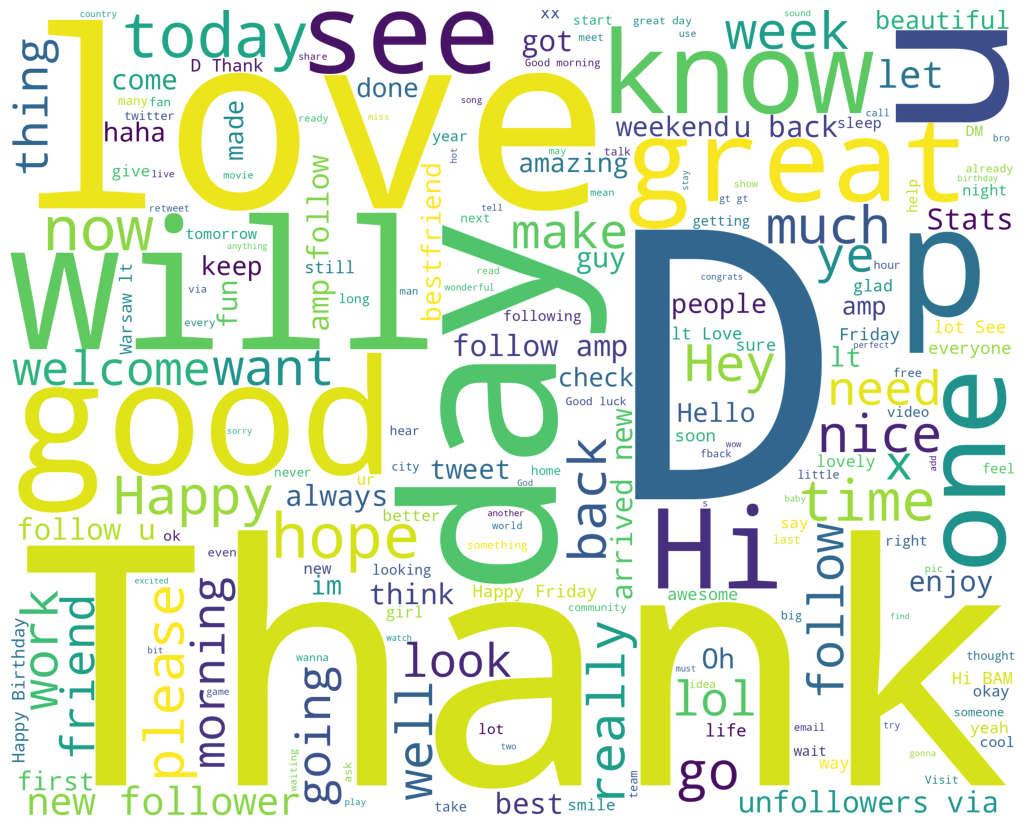

Negative words


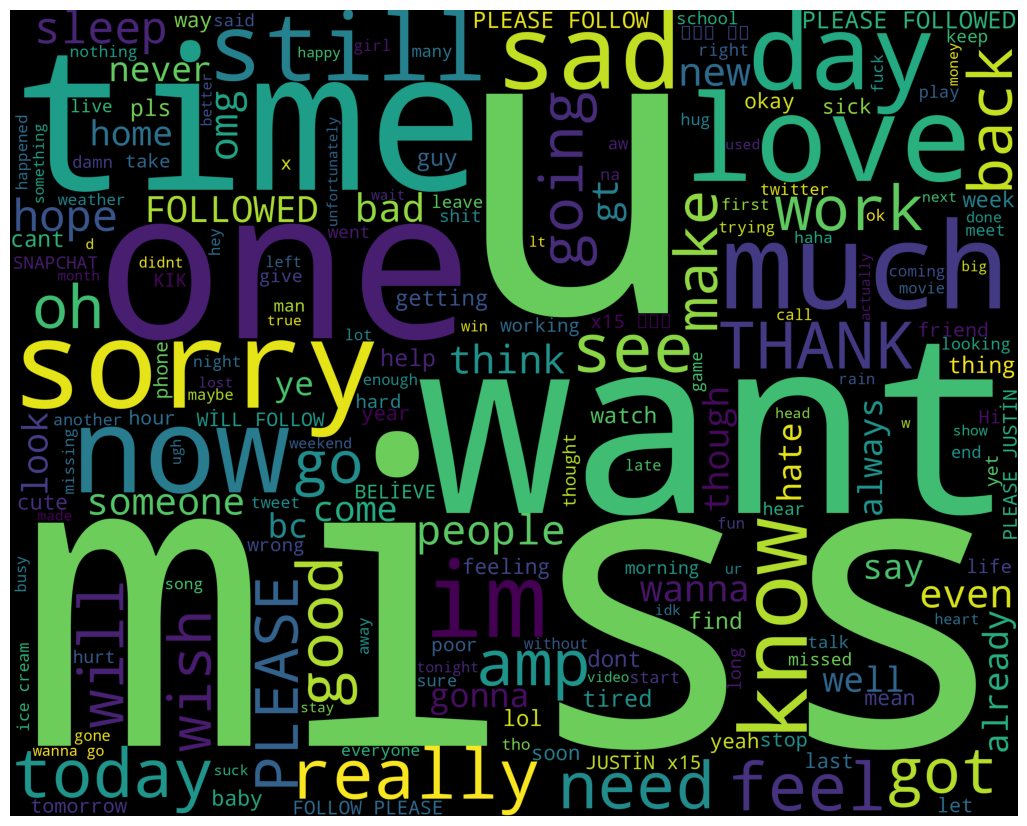

In [ ]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

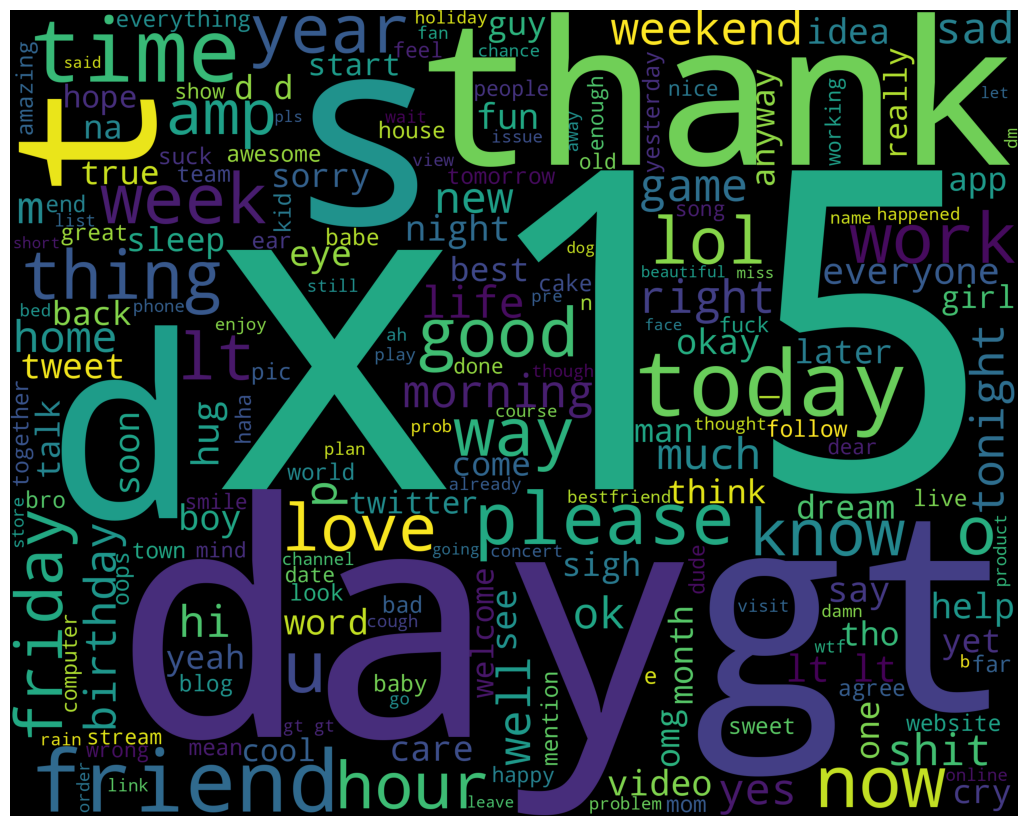

In [ ]:
wordcloud_draw(w_features)

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 477/405 
[Positive]: 523/347 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [ ]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[405  72]
 [176 347]]


In [ ]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [52]:
# prompt: measure F1 score, and recall, and precision

from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)

new_row = pd.DataFrame({'model': ['NB'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df


F1 Score: 0.7504990146854017
Recall: 0.752
Precision: 0.7656331812076126


,model,F1,recall,precision
0,NB,0.750499,0.752,0.765633
1,NB,0.750499,0.752,0.765633


In [ ]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.752


In [53]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)

new_row = pd.DataFrame({'model': ['LG'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)
# results_df


Accuracy: 0.749
F1 Score: 0.7489068744368473
Recall: 0.749
Precision: 0.7530361702127659
Confusion Matrix:
 [[378  99]
 [152 371]]


,model,F1,recall,precision
0,NB,0.750499,0.752,0.765633
1,NB,0.750499,0.752,0.765633
2,LG,0.748907,0.749,0.753036


In [54]:
# prompt: the same as above but with random forest

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)

new_row = pd.DataFrame({'model': ['RF'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)


Accuracy: 0.624
F1 Score: 0.584560541559076
Recall: 0.624
Precision: 0.7330911083710097
Confusion Matrix:
 [[456  21]
 [355 168]]


In [55]:
# GradientBoosting

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = GradientBoostingClassifier(n_estimators=250, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


new_row = pd.DataFrame({'model': ['GradientBoosting'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

Accuracy: 0.717
F1 Score: 0.7143037207603884
Recall: 0.717
Precision: 0.734015
Confusion Matrix:
 [[397  80]
 [203 320]]


In [56]:
# MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)

new_row = pd.DataFrame({'model': ['MultinomialNB'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

Accuracy: 0.762
F1 Score: 0.7618971774193549
Recall: 0.762
Precision: 0.7662547070940696
Confusion Matrix:
 [[385  92]
 [146 377]]


In [57]:
# SVM

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = SVC(random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)

new_row = pd.DataFrame({'model': ['SVM'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

Accuracy: 0.746
F1 Score: 0.7445445878274268
Recall: 0.746
Precision: 0.75894421129066
Confusion Matrix:
 [[401  76]
 [178 345]]


In [59]:
from sklearn.metrics import f1_score, precision_score, recall_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text, pos_threshold=0.05, neg_threshold=-0.05):
  """
  Classifies sentiment using Vader and assigns labels.
  """
  score = analyzer.polarity_scores(text)['compound']
  if score >= pos_threshold:
    return 1  # Positive
  elif score <= neg_threshold:
    return 0  # Negative
  else:
    return 1  # Neutral (defaulting to positive for simplicity)

# Apply Vader sentiment analysis to the test set
y_pred_vader = [get_vader_sentiment(tweet) for tweet in test['Tweet']]
# Calculate evaluation metrics
f1_vader = f1_score(test['Sentiment'], y_pred_vader, average='weighted')
precision_vader = precision_score(test['Sentiment'], y_pred_vader, average='weighted')
recall_vader = recall_score(test['Sentiment'], y_pred_vader, average='weighted')
print("Vader Sentiment Analysis:")
print(f"F1 Score: {f1_vader:.4f}")
print(f"Precision: {precision_vader:.4f}")
print(f"Recall: {recall_vader:.4f}")

new_row = pd.DataFrame({'model': ['Vader'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)


Vader Sentiment Analysis:
F1 Score: 0.8277
Precision: 0.8487
Recall: 0.8310


In [63]:
# Vader + LR

# prompt: You can utilize the sentiment scores generated by Vader as features in a machine learning model like Logistic Regression or Random Forest. Can you implement it?

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Apply Vader sentiment analysis to get compound scores for training data
train['Vader Compound Score'] = train['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Prepare the training data with Vader compound score as a feature
X_train = train[['Tweet', 'Vader Compound Score']]  # Use both tweet text and Vader score
y_train = train['Sentiment']

# Apply Vader sentiment analysis to get compound scores for testing data
test['Vader Compound Score'] = test['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Prepare the test data with Vader compound score as a feature
X_test = test[['Tweet', 'Vader Compound Score']]
y_test = test['Sentiment']

# Use CountVectorizer to transform tweet text into numerical features
vectorizer = CountVectorizer(stop_words='english')
X_train_text_vectorized = vectorizer.fit_transform(X_train['Tweet'])
X_test_text_vectorized = vectorizer.transform(X_test['Tweet'])


# Combine the text features with the Vader compound score
X_train_combined = np.hstack((X_train_text_vectorized.toarray(), X_train['Vader Compound Score'].values.reshape(-1, 1)))
X_test_combined = np.hstack((X_test_text_vectorized.toarray(), X_test['Vader Compound Score'].values.reshape(-1, 1)))

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression with Vader Compound Score as Feature:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)

new_row = pd.DataFrame({'model': ['Vader + LR'], 'F1': [f1], 'recall': [recall], 'precision': [precision]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

# You can also try with RandomForestClassifier
# Train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model_rf.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_combined)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest with Vader Compound Score as Feature:")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("Confusion Matrix:\n", cm_rf)

new_row = pd.DataFrame({'model': ['Vader + RF'], 'F1': [f1_rf], 'recall': [recall_rf], 'precision': [precision_rf]})

# Add the new row to the original DataFrame using pd.concat
results_df = pd.concat([results_df, new_row], ignore_index=True)

Logistic Regression with Vader Compound Score as Feature:
Accuracy: 0.902
F1 Score: 0.9019803508771929
Recall: 0.902
Precision: 0.9019896337720793
Confusion Matrix:
 [[426  51]
 [ 47 476]]

Random Forest with Vader Compound Score as Feature:
Accuracy: 0.692
F1 Score: 0.67404040226199
Recall: 0.692
Precision: 0.768463723552992
Confusion Matrix:
 [[453  24]
 [284 239]]


In [70]:
results_df.T # Best result is Vader+LR with F1 0.90198

,0,1,2,3,4,5,6,7,8
model,NB,LG,RF,GradientBoosting,MultinomialNB,SVM,Vader,Vader + LR,Vader + RF
F1,0.750499,0.748907,0.584561,0.714304,0.761897,0.744545,0.744545,0.90198,0.67404
recall,0.752,0.749,0.624,0.717,0.762,0.746,0.746,0.902,0.692
precision,0.765633,0.753036,0.733091,0.734015,0.766255,0.758944,0.758944,0.90199,0.768464
